#### Проверочная работа
### Центральная предельная теорема своими руками

Выполнено на распределении Парето 

Его плотность имее вид: $$ f_{X}(x)={\begin{cases}{\frac {x^k_m}{x^{k+1}}},&x\geq 0,\\0,&x<0.\end{cases}}. $$
Математическое ожидание: $${\mathbb  {E}}[X]={\frac  {kx^k_m}{x^{k+1}}}$$
Дисперсия: $${D}[X]={\left(\frac {x_m}{k-1}\right)^2}{\frac  {k}{k-2}}$$



Математическое ожидание:
1.09009009009
Дисперсия:
0.00972339746758


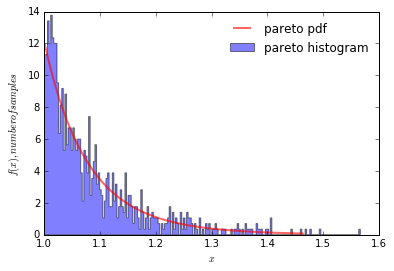

In [1]:
import numpy as np
import math
import scipy
from scipy.stats import pareto
from scipy.stats import norm
#import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline


# Используем распределение Парето с параметрами Xm = 1 k = b
b = 12.1
mean, var = pareto.stats(b, moments='mv')
# Получаем математическое ожидание и дисперсию
print 'Математическое ожидание:'
print mean
print 'Дисперсия:'
print var

# Определям отрезок для построения плотности распределения 
# выбираем 100 значений в диапазоне значений функции распределения от 0,01 до 0,99 
x = np.linspace(pareto.ppf(0.01, b),pareto.ppf(0.99, b), 100)

# выборка из 1000 случайных величин имеющих распределение Парето
r = pareto.rvs(b, size=1000)

#Строим гистограмму и функцию распределения
plt.hist(r, bins=200,normed=True, histtype='stepfilled', alpha=0.5, label='pareto histogram')
plt.plot(x, pareto.pdf(x, b),'r-', lw=2, alpha=0.6, label='pareto pdf')
plt.ylabel('$f(x), number of samples$')
plt.xlabel('$x$')
plt.legend(loc='best', frameon=False)


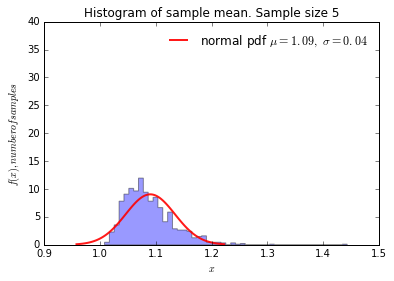

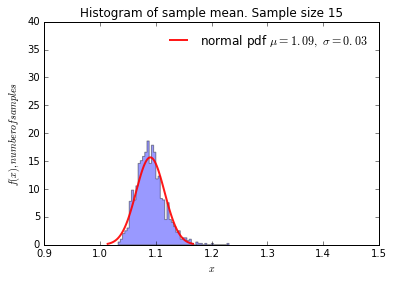

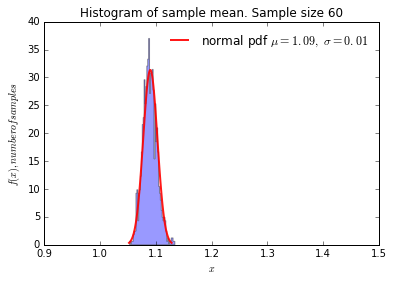

In [2]:
# создаём нулевую матрицу, для вспомогательного сохранения параметров графиков
axs = np.zeros((3,4))

j=0
# Выбираем три размера выборки 5,15,60
for N in [5, 15,60]:
                # Каждую выборку будем отображать в отдельном окне
                plt.figure(j)
                # pareto.rvs(b, size=N) - выборка N случайных величин из распределения Парето
                # scipy.mean - функция возвращает среднеее сначение
                r = scipy.array([scipy.mean(pareto.rvs(b, size=N)) for i in range(1000)])
                # Гистограмма по полученной выборке
                plt.hist(r, bins=50,normed=1, histtype='stepfilled', alpha=0.4)
                # Рассчитываем среднеквадратичное отклонение, используем значение дисперсии полученное выше
                sigma=math.sqrt(var/N)
                # Функция норамального распределения с параметрами мат. ожитание = mean (получена выше)
                # и среднеквадратичное отклонением = sigma 
                norm_rv = norm(loc=mean, scale=sigma)
                # используем правило трёх сигма получения отрезка на котором будет изображаться 
                # плотностm нормального распределения
                x = np.linspace(mean-3*sigma,mean+3*sigma, 100)
                plt.plot(x, norm_rv.pdf(x),'r-', lw=2, alpha=0.9, label='normal pdf '+r'$\mu='
                         +str(round(mean,2))+',\ \sigma='+str(round(sigma,2))+'$')
                # Сохраняем размер шкал 
                axs[j]=plt.axis()
                plt.title('Histogram of sample mean. Sample size '+str(N))
                plt.ylabel('$f(x), number of samples$')
                plt.xlabel('$x$')
                plt.legend(loc='best', frameon=False)
                j+=1
# Для наглядности приравниваем шкалы всех графиков
for j in [0,1,2]:
                plt.figure(j)
                plt.axis([min(axs[:,0]),max(axs[:,1]),min(axs[:,2]),max(axs[:,3])])
    

    


Выводы:
Данный пример демонстрирует центральную предельную теорему.
Чем больше объем выборки, тем распределение становится более гладким и тем больше оно похоже на нормальное. 


Так как распределение Парето ассиметрично, распределение выборочного среднего приближается к нормальному при размере выборки больше 50 